## Step 1. Import Dataset

In [245]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [246]:
data = pd.read_csv('./data/train.csv')
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [247]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [248]:
data = pd.read_csv('./data/train.csv', index_col='Id')
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Step 2. Data Preprocessing
### 2.1. Feature Selection

In [249]:
# Use Feature Engineering to select features
features = ["LotArea", "Street", "Utilities", "YearBuilt", "HouseStyle", "Electrical", "1stFlrSF", "2ndFlrSF",
            "FullBath", "BedroomAbvGr", "TotRmsAbvGrd"]


### 2.2. Splitting dataset into X, y

In [250]:
X = data[features]
y = data['SalePrice']


### 2.3. Data Imputation (Missing Data Replacement)

In [251]:
# Finding columns with missing data
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotArea       1460 non-null   int64 
 1   Street        1460 non-null   object
 2   Utilities     1460 non-null   object
 3   YearBuilt     1460 non-null   int64 
 4   HouseStyle    1460 non-null   object
 5   Electrical    1459 non-null   object
 6   1stFlrSF      1460 non-null   int64 
 7   2ndFlrSF      1460 non-null   int64 
 8   FullBath      1460 non-null   int64 
 9   BedroomAbvGr  1460 non-null   int64 
 10  TotRmsAbvGrd  1460 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 136.9+ KB


In [252]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
X.loc[:,'Electrical'] = imputer.fit_transform(X[['Electrical']])[:,0]
X

,LotArea,Street,Utilities,YearBuilt,HouseStyle,Electrical,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,,,,,
1,8450,Pave,AllPub,2003,2Story,SBrkr,856,854,2,3,8
2,9600,Pave,AllPub,1976,1Story,SBrkr,1262,0,2,3,6
3,11250,Pave,AllPub,2001,2Story,SBrkr,920,866,2,3,6
4,9550,Pave,AllPub,1915,2Story,SBrkr,961,756,1,3,7
5,14260,Pave,AllPub,2000,2Story,SBrkr,1145,1053,2,4,9
...,...,...,...,...,...,...,...,...,...,...,...
1456,7917,Pave,AllPub,1999,2Story,SBrkr,953,694,2,3,7
1457,13175,Pave,AllPub,1978,1Story,SBrkr,2073,0,2,3,7
1458,9042,Pave,AllPub,1941,2Story,SBrkr,1188,1152,2,4,9


### 2.4. X, y → X_train, y_train, X_valid, y_valid

In [253]:
from sklearn.model_selection import train_test_split

# Use random_state ~ seed()
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [254]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape
X_train

,LotArea,Street,Utilities,YearBuilt,HouseStyle,Electrical,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,,,,,
619,11694,Pave,AllPub,2007,1Story,SBrkr,1828,0,2,3,9
871,6600,Pave,AllPub,1962,1Story,SBrkr,894,0,1,2,5
93,13360,Pave,AllPub,1921,1Story,SBrkr,964,0,1,2,5
818,13265,Pave,AllPub,2002,1Story,SBrkr,1689,0,2,3,7
303,13704,Pave,AllPub,2001,1Story,SBrkr,1541,0,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...
764,9430,Pave,AllPub,1999,2Story,SBrkr,1268,1097,2,3,8
836,9600,Pave,AllPub,1950,1Story,SBrkr,1067,0,2,2,4
1217,8930,Pave,AllPub,1978,1.5Fin,SBrkr,1318,584,2,4,8


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Step 3. Encode Categorical Data and Feature Scaling

In [255]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols  = X.select_dtypes(include=['int64']).columns

categorical_cols_indicies = [X.columns.get_loc(col) for col in categorical_cols]
numeric_cols_indicies = [X.columns.get_loc(col) for col in numeric_cols]

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_cols_indicies),
                  ('num', StandardScaler(), numeric_cols_indicies)],
    remainder="passthrough"
)

X_train = ct.fit_transform(X_train)
X_valid = ct.transform(X_valid)


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Step 4. Traning Machine Learning Model

In [257]:
from sklearn.ensemble import GradientBoostingRegressor


rf_model = GradientBoostingRegressor(random_state=1, n_estimators=210)
# rf_model = svm.SVR()
rf_model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=210, random_state=1)

In [258]:
rf_val_preds = rf_model.predict(X_valid)

In [259]:
rf_val_preds[:10], y_valid[: 10]

(array([320742.1269278 , 158875.90763577, 121192.77623423, 192887.73180443,
         91209.32933911,  94998.47108188, 242885.68603893, 125893.76219096,
        490505.41588091, 157197.40883775]),
 Id
 530     200624
 492     133000
 460     110000
 280     192000
 656      88000
 1014     85000
 1404    282922
 602     141000
 1183    745000
 688     148800
 Name: SalePrice, dtype: int64)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Step 5. Model Evaluation

In [260]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [261]:
mae = mean_absolute_error(y_valid, rf_val_preds)
mse = mean_squared_error(y_valid, rf_val_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, rf_val_preds)
mape = np.mean(np.abs((y_valid - rf_val_preds)/y_valid)) * 100

In [262]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Error (MAE): 25231.322026096757
Mean Squared Error (MSE): 1857544695.000748
Root Mean Squared Error (RMSE): 43099.24239474225
R-squared (R²): 0.7310186718965636
Mean Absolute Percentage Error (MAPE): 13.91471108195378%


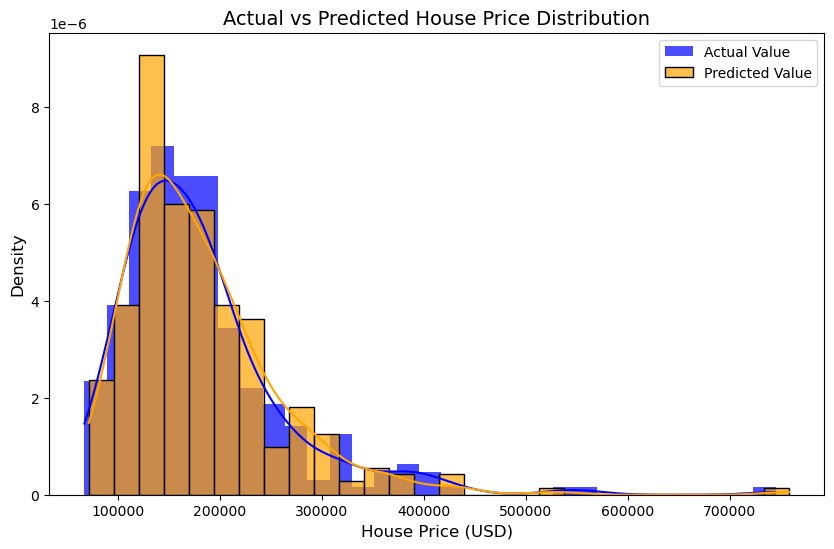

In [218]:
plt.figure(figsize=(10, 6))

# Draw histogram for actual values
sns.histplot(y_valid, color='blue', kde=True, label='Actual Value', stat='density', linewidth=0, alpha=0.7)

# Draw histogram for predicted values
sns.histplot(rf_val_preds, color='orange', kde=True, label='Predicted Value', stat='density', alpha=0.7)

# Add title and label
plt.title("Actual vs Predicted House Price Distribution", fontsize=14)
plt.xlabel("House Price (USD)", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Add legend to differentiate between the two
plt.legend();
